#***FAKE INSTAGRAM ACOUNT DETECTOR***


##**UNDERSTANDING THE PROBLEM**

This project aim is to build and train a deep neural network model to detect fake or spam instagram accounts.

These days spam accounts have become a major problem in in all the social media platforms.

Many users are creating fake accounts to create an illusion of having many followers to thier personal accounts.

Fake accounts are being created to sell fake products and services.

They are also being used to impersonate other account users from common people to celebrities in order to influence, criticize, hurt feelings and reputation.


There are few key input features which we considered to determine if the account is fake or not.

THE INPUT FEATURES ARE:



1.**PROFILE PICTURE** - The user has profile picture or not.

2.**NUMS/LENGTH USERNAME** - The ratio of number of numerical chars in username to its length.

3.**FULLNAME WORDS** - Full name in word tokens

4.**NAME/LENGTH OF FULL NAME** - The ratio of number of numerical characters in full name to its length.

5.**NAME == USERNAME** - Are username and full name literally the same?

6.**DESCRIPTION LENGTH** - Bio length in characters.

7.**EXTERNAL URL** - Has external URL or not.

8.**PRIVATE** - Private or not.

9.**POSTS** - Number of posts.

10.**FOLLOWERS** - Number of followers.

11.**FOLLOWS** - Number of follows.












###***Data Collection:***

####***LOADING LIBRAIRES***

In [ ]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

!pip install --upgrade jax jaxlib  # Upgrade jax and jaxlib to resolve potential version conflicts

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

In [ ]:
!pip install jupyterthemes


from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.7 MB/s eta 0:00:00


####*** Gather a diverse dataset of Instagram using web scraping techniques***

In [ ]:
url = "https://raw.githubusercontent.com/deepd1534/instagram-fake-account-detection/main/test.csv"

Test_data = pd.read_csv(url)

url2 = "https://raw.githubusercontent.com/deepd1534/instagram-fake-account-detection/main/train.csv"

Train_data = pd.read_csv(url2)

In [ ]:
#print Train data dataset
Train_data

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [ ]:
#print Test data dataset
Test_data

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


##**TASK 2**

###**Feature Extraction:**

####***Performing Exploratory Data Anlaysis For "Training Dataset"***

In [ ]:
print("INFO ABOUT TRAIN DATA :- \n")
Train_data.info()

INFO ABOUT TRAIN DATA :- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [ ]:
print("NULL VALUES IN TRAIN DATA :- \n")

Train_data.isnull().sum()

NULL VALUES IN TRAIN DATA :- 



profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
print("INFO ABOUT PROFILE PIC UN TRAIN DATA :- \n")

Train_data['profile pic'].value_counts()

INFO ABOUT PROFILE PIC UN TRAIN DATA :- 



profile pic
1    404
0    172
Name: count, dtype: int64

In [ ]:
print("INFO ABOUT FAKE AND REAL ACCOUNTS IN TRAIN DATA :- \n")

Train_data['fake'].value_counts()

INFO ABOUT FAKE AND REAL ACCOUNTS IN TRAIN DATA :- 



fake
0    288
1    288
Name: count, dtype: int64

In [ ]:
print("INFO ABOUT PRIVATE ACCOUNT IN TRAIN DATA :- \n")

Train_data['private'].value_counts()

INFO ABOUT PRIVATE ACCOUNT IN TRAIN DATA :- 



private
0    356
1    220
Name: count, dtype: int64

In [ ]:
print("AVERAGE DESCRIPTION LENGTH OF ACCOUNT IN TRAIN DATA :- \n")
Train_data['description length'].mean()

AVERAGE DESCRIPTION LENGTH OF ACCOUNT IN TRAIN DATA :- 



22.62326388888889

In [ ]:
print("ACCOUNT DESCRIPTION LENGTH GREATER THEN AVERAGE LENGHT :- \n")
cou = Train_data['description length'] > Train_data['description length'].mean()
cou.value_counts()

ACCOUNT DESCRIPTION LENGTH GREATER THEN AVERAGE LENGHT :- 



description length
False    394
True     182
Name: count, dtype: int64

In [ ]:
print("ACCOUNT HAS EXTERNAL URL OR NOT IN TRAIN DATA :- \n")
Train_data['external URL'].value_counts()

ACCOUNT HAS EXTERNAL URL OR NOT IN TRAIN DATA :- 



external URL
0    509
1     67
Name: count, dtype: int64

#**IN THIS DATASET THERE AR NON ERROR VALUES SO I SKIP DATA CLEANING**

##**TASK 3**

###**Preprocessing:**

####***PREPARING THE DATA TO FEED THE MODEL***

In [ ]:
#Preparing inputs for the model (Dropping the fake column from both training and testing dataset)
x_train = Train_data.drop(columns = ['fake'])
x_test = Test_data.drop(columns = ['fake'])

#print x_train dataset to see its worked or not
x_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [ ]:
#print x_Test dataset to see its worked or not
x_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811
116,1,0.40,1,0.00,0,0,0,0,4,150,164
117,1,0.00,2,0.00,0,0,0,0,3,833,3572
118,0,0.17,1,0.00,0,0,0,0,1,219,1695


In [ ]:
#Preparing the outputs (Takin only the fake column into consideration.)
y_train = Train_data['fake']
y_test = Test_data['fake']

#print y_train dataset to see its worked or not
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [ ]:
#print y test datset to see its worked or not
y_test

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [ ]:
#Scaling the data before training the model (Normalize the data)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(x_train)
X_test = scaler_x.transform(x_test)

In [ ]:
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [ ]:
#Having a look at the shapes after scaling the data
X_train.shape,X_test.shape

((576, 11), (120, 11))

In [ ]:
Y_train.shape,Y_test.shape

((576, 2), (120, 2))

In [ ]:
#Percentage of Traininf data
Training_data_percentage = len(X_train)/(len(X_train) + len(X_test) ) * 100
Training_data_percentage

82.75862068965517

In [ ]:
Testing_data_percentage = len(X_test)/(len(X_train) + len(X_test) ) * 100
Testing_data_percentage

17.24137931034483

##**TASK 5**

###**Building a  Machine Learning Model:**

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#Building the main model***

model = Sequential()
model.add(Dense(50,input_dim = 11, activation = "relu")) #Initial Layer
model.add(Dropout(0.3))
model.add(Dense(150, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(25, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation = "softmax")) #output layer

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 25)                3775      
                                                                 
 dropout_2 (Dropout)         (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 5

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs_hist = model.fit(X_train, Y_train, epochs = 20, verbose = 1, validation_split = 0.1)

Epoch 1/20
17/17 [==============================] - 2s 18ms/step - loss: 0.6343 - accuracy: 0.6351 - val_loss: 0.5532 - val_accuracy: 0.7241
Epoch 2/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4858 - accuracy: 0.8320 - val_loss: 0.4648 - val_accuracy: 0.6897
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3697 - accuracy: 0.8687 - val_loss: 0.3373 - val_accuracy: 0.7759
Epoch 4/20
17/17 [==============================] - 0s 5ms/step - loss: 0.3348 - accuracy: 0.8764 - val_loss: 0.3331 - val_accuracy: 0.8103
Epoch 5/20
17/17 [==============================] - 0s 4ms/step - loss: 0.2965 - accuracy: 0.8919 - val_loss: 0.2800 - val_accuracy: 0.8621
Epoch 6/20
17/17 [==============================] - 0s 5ms/step - loss: 0.2587 - accuracy: 0.8958 - val_loss: 0.2686 - val_accuracy: 0.8793
Epoch 7/20
17/17 [==============================] - 0s 5ms/step - loss: 0.2686 - accuracy: 0.8958 - val_loss: 0.2085 - val_accuracy: 0.8966
Epoch 8/20
17/17 [=

##**TASK 6**

###**Real-Time Detection:**

In [ ]:
# Use a coustom user data to see the working of model

user_data = {
    'profile pic' : 1, #Here 1 means yes and 0 means No
    'nums/length username' : 0.13, #length of username
    'nums/length fullname' : 0.15, #length of fullname
    'fullname words' : 4, #number of words in fullname
    'name==username' : 0, #here 1 means name and username are same and 0 means not same
    'description length' : 36, #length of description
    'external URL' : 0, #here 1 means yes and 0 means No
    'private' : 1, #here 1 means yes and 0 means No
    '#posts' : 7, #number of posts
    '#followers' : 24, #number of followers
    '#following' : 8,  #number of following
    }

In [ ]:
#convert the user data into a dataframe

data = pd.DataFrame(user_data, index = [0])

In [ ]:
print(data)

   profile pic  nums/length username  nums/length fullname  fullname words  \
0            1                  0.13                  0.15               4   

   name==username  description length  external URL  private  #posts  \
0               0                  36             0        1       7   

   #followers  #following  
0          24           8  


#***Prediction By The Model:***

In [ ]:
pred = model.predict(data)

if pred[0][0] > pred[0][1]:
    print("Real Account")
else:
    print("Fake Account")

1/1 [==============================] - 0s 41ms/step
Real Account


##**TASK 7**

###**Feedback**

In [ ]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


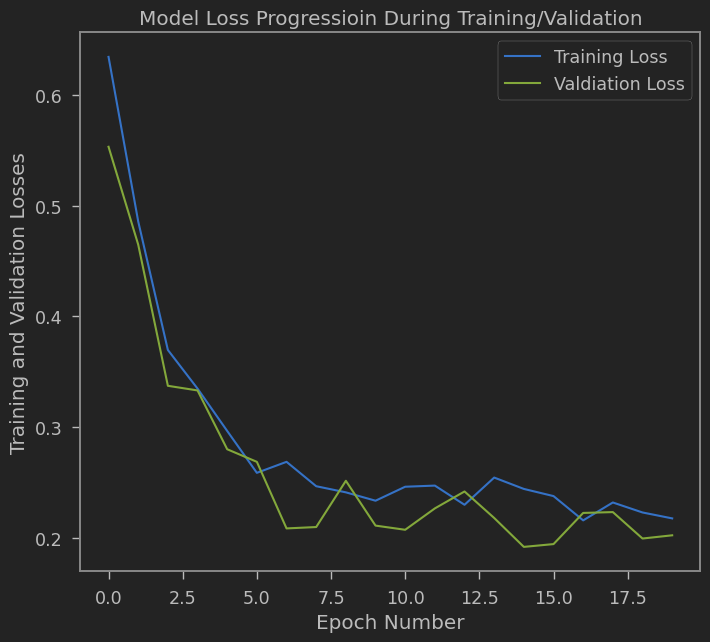

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progressioin During Training/Validation')
plt.xlabel('Epoch Number')
plt.ylabel('Training and Validation Losses')
plt.legend(['Training Loss','Valdiation Loss'])

In [ ]:
predicted = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [ ]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in Y_test:
    test.append(np.argmax(i))

In [ ]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        60
           1       0.91      0.83      0.87        60

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.88      0.88      0.87       120



<Axes: >

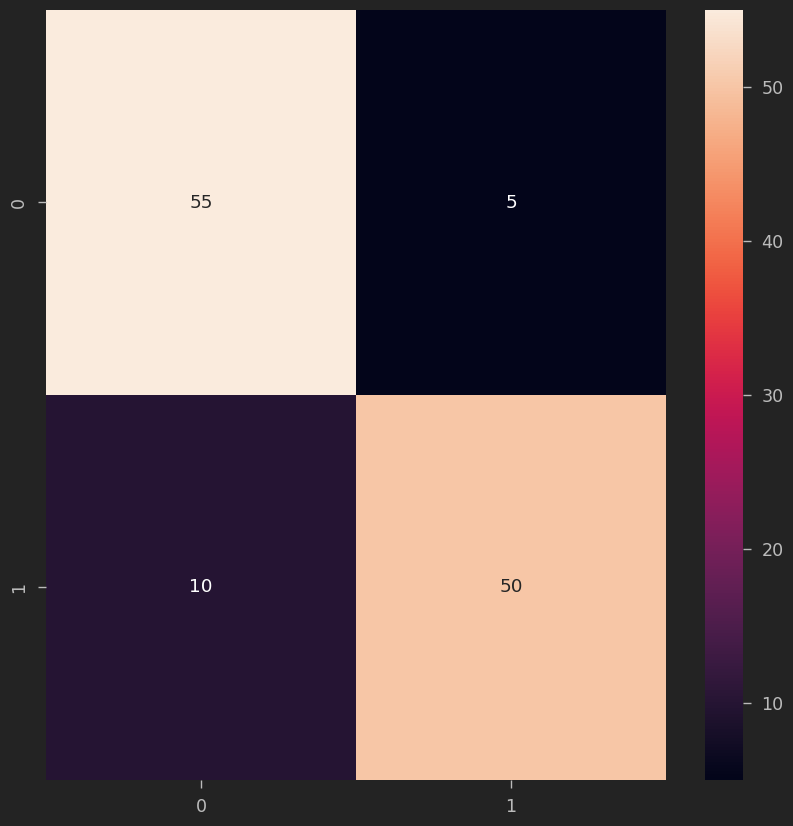

In [ ]:
plt.figure(figsize=(10, 10))
con_matrix = confusion_matrix(test,predicted_value)
sns.heatmap(con_matrix, annot=True)